In [1]:
cd ~/EIT6-Crane-Control

In [2]:
pkg load signal

data1 = csvread("test/head_natural_frequency/angleData.csv");
data2 = csvread("test/head_natural_frequency/angleDataHand.csv");

time1 = data1(:,1)./1e6;
angle1 = data1(:,2);

time2 = data2(:,1)./1e6;
angle2 = data2(:,2);

In [4]:
function [f, A] = fftFrequency (time,signal,freqinterp)
    x1 = linspace(time(1),time(length(time)),(time(length(time))-time(1))*freqinterp);
    y1 = interp1(time, signal,x1,'linear');
    A = (abs(fft(y1))./freqinterp)';
    f = (linspace(0,freqinterp,length(A)))';
endfunction

In [26]:
[f1,A1] = fftFrequency(time1,angle1,20);
[f2,A2] = fftFrequency(time2,angle2,20);

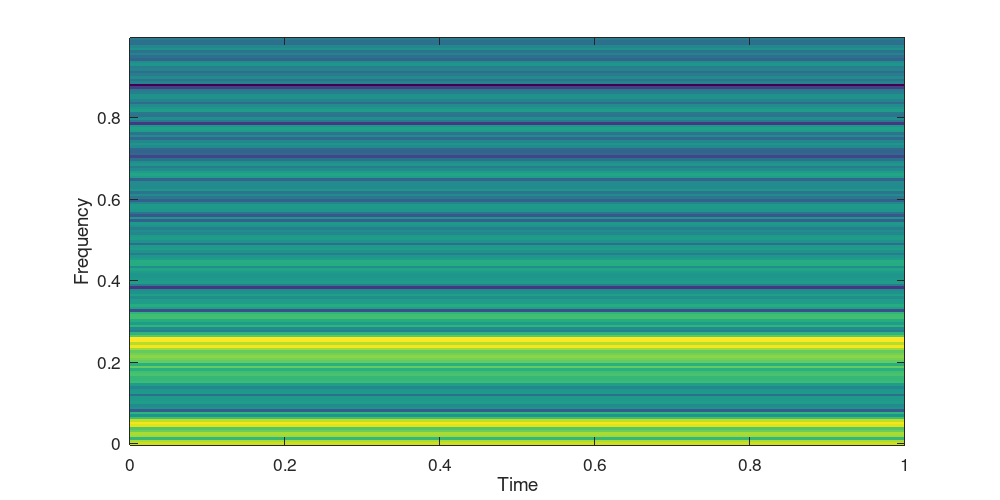

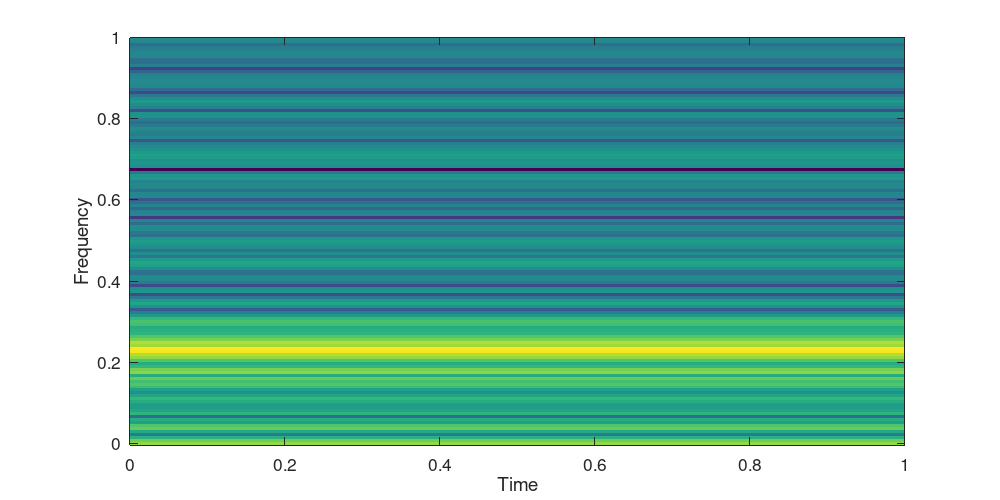

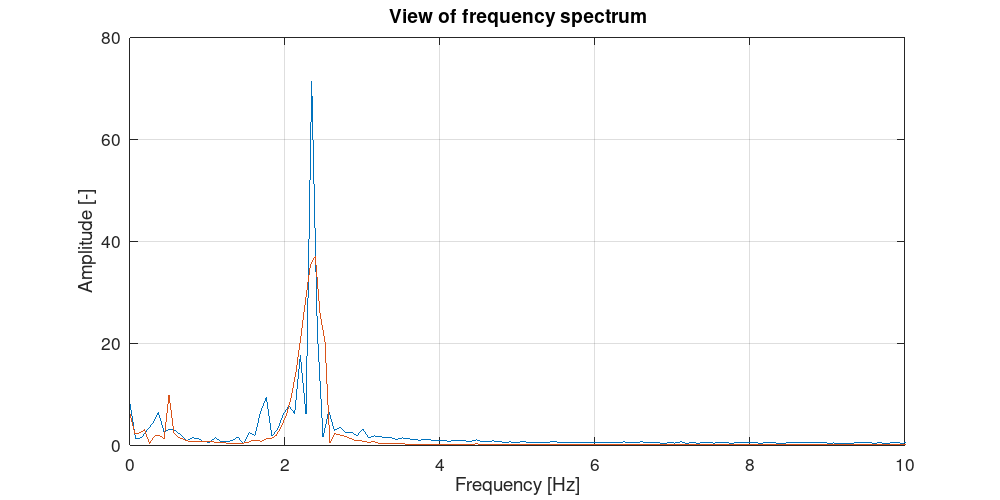

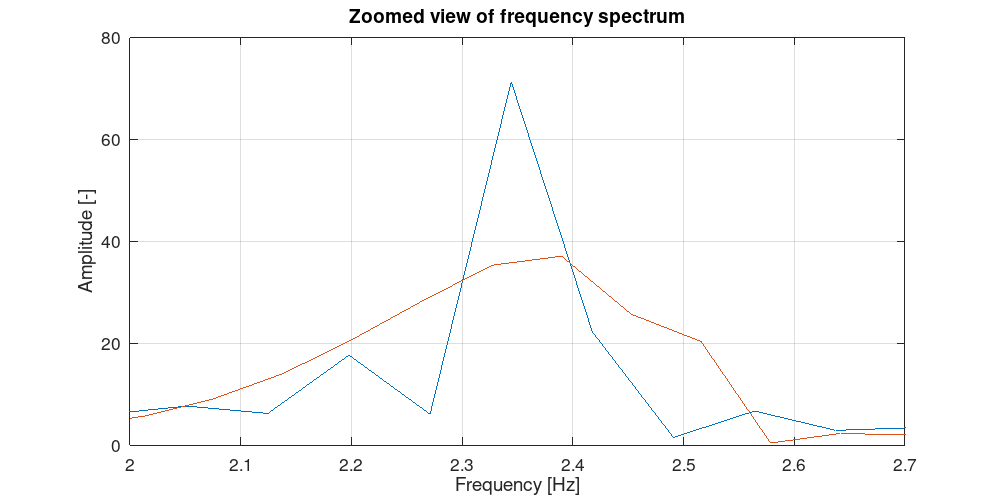

In [29]:
figure("position",[0,0,1000,500])
plot(f1,A1,f2,A2)
title("Zoomed view of frequency spectrum")
xlim([2 2.7])
xlabel("Frequency [Hz]")
ylabel("Amplitude [-]")
grid on

figure("position",[0,0,1000,500])
plot(f1,A1,f2,A2)
title("View of frequency spectrum")
xlabel("Frequency [Hz]")
ylabel("Amplitude [-]")
xlim([0 10])
grid on

figure("position",[0,0,1000,500])
specgram(ifft(A1),length(ifft(A1))-1)

figure("position",[0,0,1000,500])
specgram(ifft(A2),length(ifft(A2))-1)